##  Dataset Info
- Source: Kaggle (https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset)
- Target Variable: `stroke` (1 = stroke, 0 = no stroke)
- Features: Age, gender, hypertension, heart disease, marital status, work type, residence, glucose level, BMI, smoking status.

# Data exploring

In [183]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [184]:
import warnings
warnings.filterwarnings('ignore')
df = pd.read_csv("healthcare-dataset-stroke-data (1).csv")
df.head(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


In [185]:
df.shape

(5110, 12)

In [186]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [187]:
df.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [188]:
df.nunique()

id                   5110
gender                  3
age                   104
hypertension            2
heart_disease           2
ever_married            2
work_type               5
Residence_type          2
avg_glucose_level    3979
bmi                   418
smoking_status          4
stroke                  2
dtype: int64

In [189]:
print(df['work_type'].unique().tolist())
print(df['Residence_type'].unique().tolist())
print(df['smoking_status'].unique().tolist())
print(df['gender'].unique().tolist())

['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked']
['Urban', 'Rural']
['formerly smoked', 'never smoked', 'smokes', 'Unknown']
['Male', 'Female', 'Other']


In [190]:
count = df['gender'].value_counts()
print(count)
countt = df['smoking_status'].value_counts()
print(countt)

gender
Female    2994
Male      2115
Other        1
Name: count, dtype: int64
smoking_status
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: count, dtype: int64


<Figure size 2000x1500 with 0 Axes>

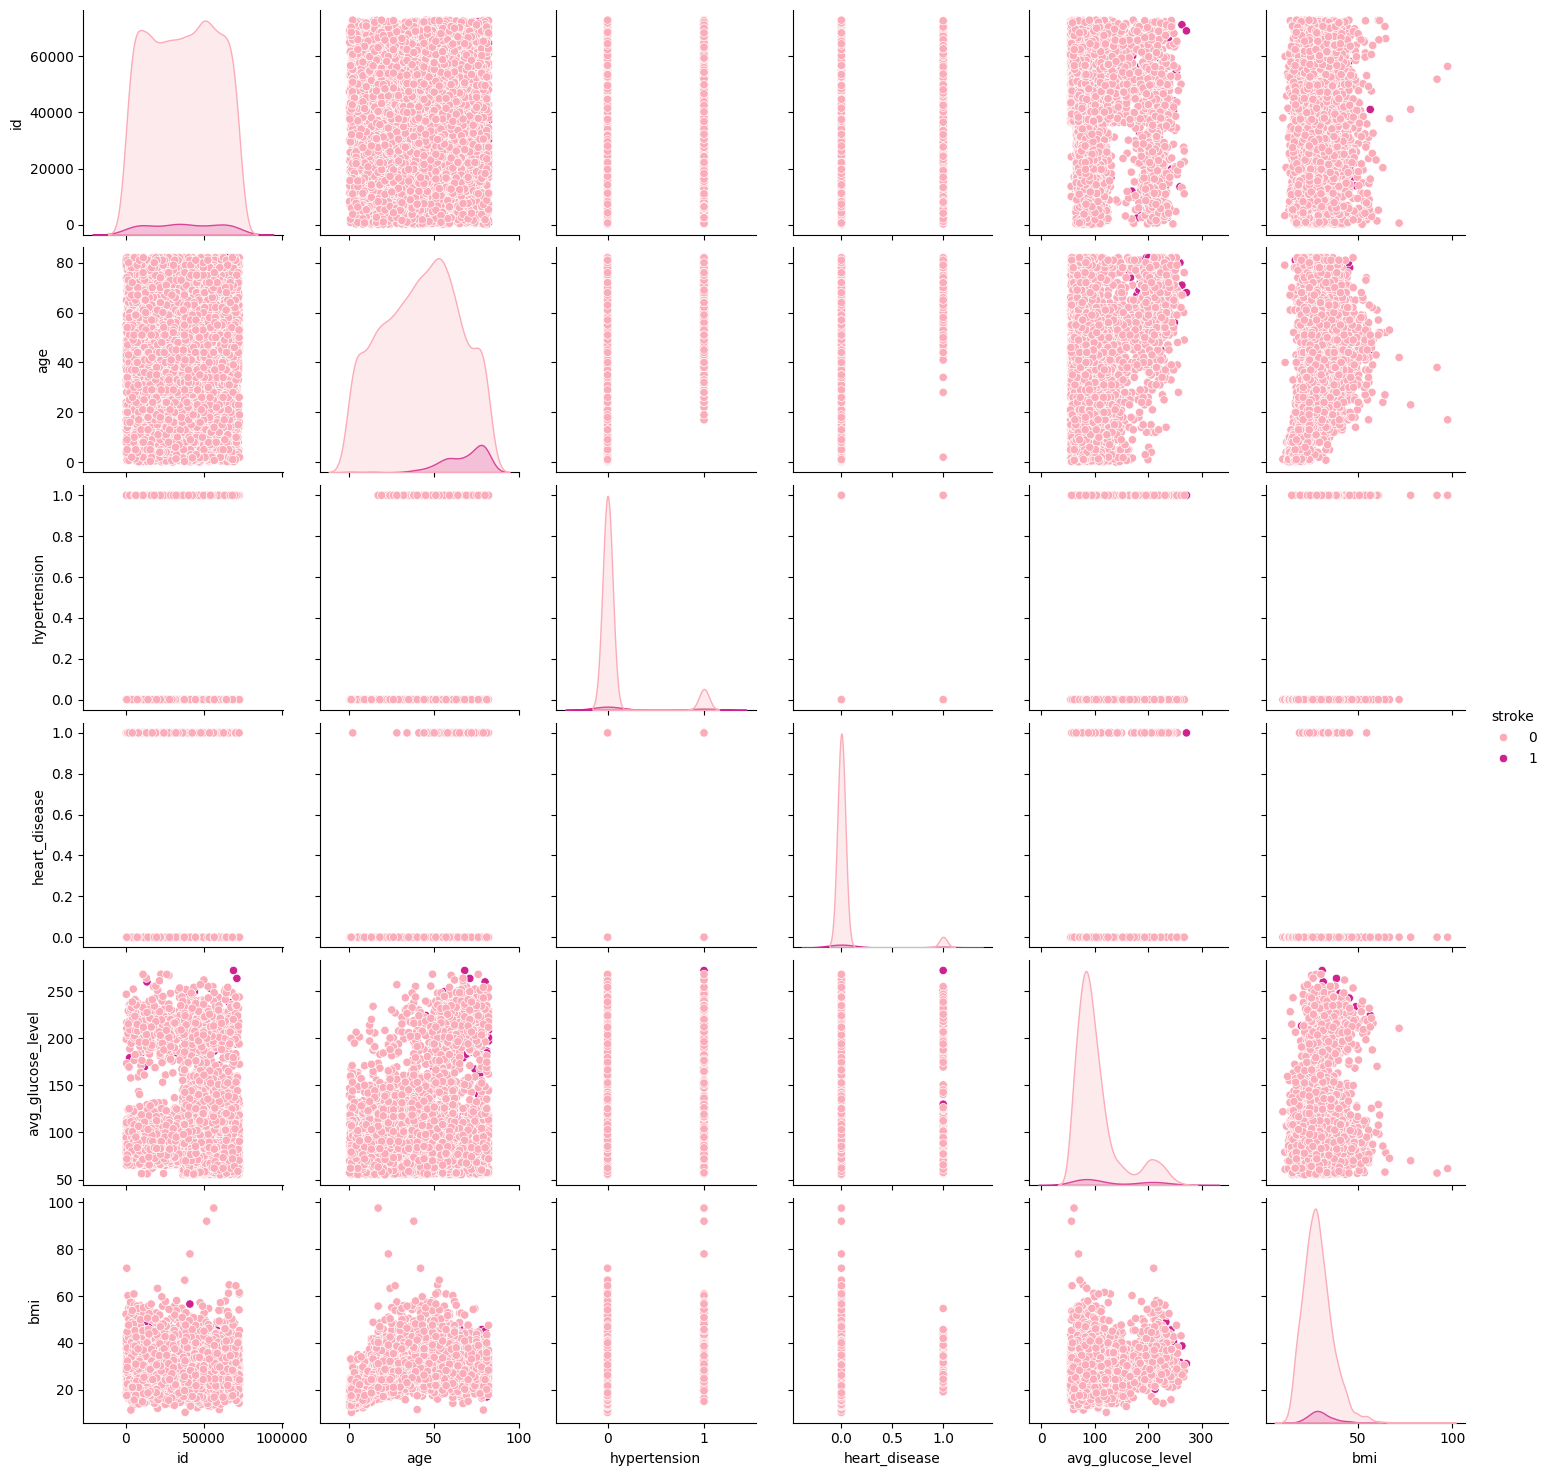

In [191]:
fig=plt.figure(figsize=(20,15),dpi=100)
sns.pairplot(df,hue="stroke",palette='RdPu');

# Data Cleaning

In [192]:
import numpy as np
df.replace(["", " ", "NA", "N/A", "None", "-", "nan", "null", "NULL"], np.nan, inplace=True)

In [193]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [194]:
df['bmi'] = df['bmi'].fillna(df['bmi'].mean())

In [195]:
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [196]:
print(df.duplicated().sum())

0


In [197]:
df.drop('id', axis=1, inplace=True)

In [198]:
df['gender'] = df['gender'].replace('Other', 'Female')
count = df['gender'].value_counts()
print(count)

gender
Female    2995
Male      2115
Name: count, dtype: int64


Text(0.5, 1.0, 'age')

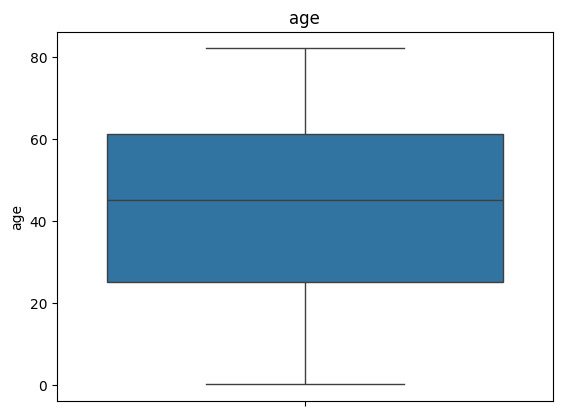

In [199]:
sns.boxplot(df['age'])
plt.title('age')

Text(0.5, 1.0, 'avg_glucose_level')

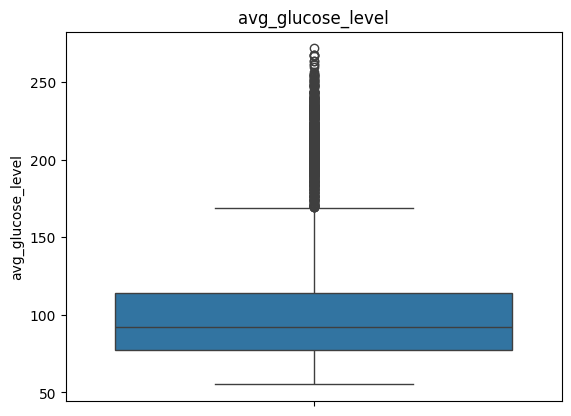

In [200]:
sns.boxplot(df['avg_glucose_level'])
plt.title('avg_glucose_level')

Text(0.5, 1.0, 'bmi')

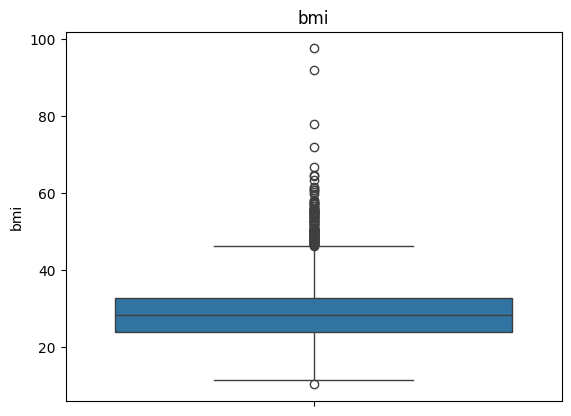

In [201]:
sns.boxplot(df['bmi'])
plt.title('bmi')

In [202]:
from scipy.stats import zscore
z_score_glucose = zscore(df['avg_glucose_level'])
z_score_bmi = zscore(df['bmi'])
glucose_outliers_count = np.sum(np.abs(z_score_glucose) > 3)
bmi_outliers_count = np.sum(np.abs(z_score_bmi) > 3)

print("all glucose :", glucose_outliers_count)
print("all bmi :", bmi_outliers_count)

all glucose : 49
all bmi : 59


In [203]:
zero_or_negative_values = {column: (df[column] <= 0).sum() for column in ['avg_glucose_level', 'bmi']}
zero_or_negative_values

{'avg_glucose_level': np.int64(0), 'bmi': np.int64(0)}

In [204]:
# Menangani Outlier untuk bmi
Q1 = df['bmi'].quantile(0.25)
Q3 = df['bmi'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

df['bmi'] = df['bmi'].clip(lower, upper)

In [205]:
# Menangani Outlier untuk avg_glucose_level
Q1 = df['avg_glucose_level'].quantile(0.25)
Q3 = df['avg_glucose_level'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

df['avg_glucose_level'] = df['avg_glucose_level'].clip(lower, upper)

In [206]:
from scipy.stats import zscore
z_score_glucose = zscore(df['avg_glucose_level'])
z_score_bmi = zscore(df['bmi'])
glucose_outliers_count = np.sum(np.abs(z_score_glucose) > 3)
bmi_outliers_count = np.sum(np.abs(z_score_bmi) > 3)

print("Remaining :", glucose_outliers_count)
print("Remaining :", bmi_outliers_count)

Remaining : 0
Remaining : 0


In [207]:
df['ever_married'] = df['ever_married'].map({'Yes': 1, 'No': 0})
df['Residence_type'] = df['Residence_type'].map({'Urban': 1, 'Rural': 0})

In [208]:
df.dtypes

gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married           int64
work_type             object
Residence_type         int64
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [209]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,1,Private,1,169.3575,36.600000,formerly smoked,1
1,Female,61.0,0,0,1,Self-employed,0,169.3575,28.893237,never smoked,1
2,Male,80.0,0,1,1,Private,0,105.9200,32.500000,never smoked,1
3,Female,49.0,0,0,1,Private,1,169.3575,34.400000,smokes,1
4,Female,79.0,1,0,1,Self-employed,0,169.3575,24.000000,never smoked,1


In [210]:
def classify_age(age):
    if age < 18:
        return '0' #Child
    elif age < 60:
        return '1' #youth
    else:
        return '2' #old
df['age_range'] = df['age'].apply(classify_age)
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,age_range
0,Male,67.0,0,1,1,Private,1,169.3575,36.600000,formerly smoked,1,2
1,Female,61.0,0,0,1,Self-employed,0,169.3575,28.893237,never smoked,1,2
2,Male,80.0,0,1,1,Private,0,105.9200,32.500000,never smoked,1,2
3,Female,49.0,0,0,1,Private,1,169.3575,34.400000,smokes,1,1
4,Female,79.0,1,0,1,Self-employed,0,169.3575,24.000000,never smoked,1,2


In [211]:
df.drop('age', axis=1, inplace=True)

In [212]:
df.head()

,gender,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,age_range
0,Male,0,1,1,Private,1,169.3575,36.600000,formerly smoked,1,2
1,Female,0,0,1,Self-employed,0,169.3575,28.893237,never smoked,1,2
2,Male,0,1,1,Private,0,105.9200,32.500000,never smoked,1,2
3,Female,0,0,1,Private,1,169.3575,34.400000,smokes,1,1
4,Female,1,0,1,Self-employed,0,169.3575,24.000000,never smoked,1,2


In [213]:
df.to_csv('final cleaned stroke.csv', index=False)

# Analysis

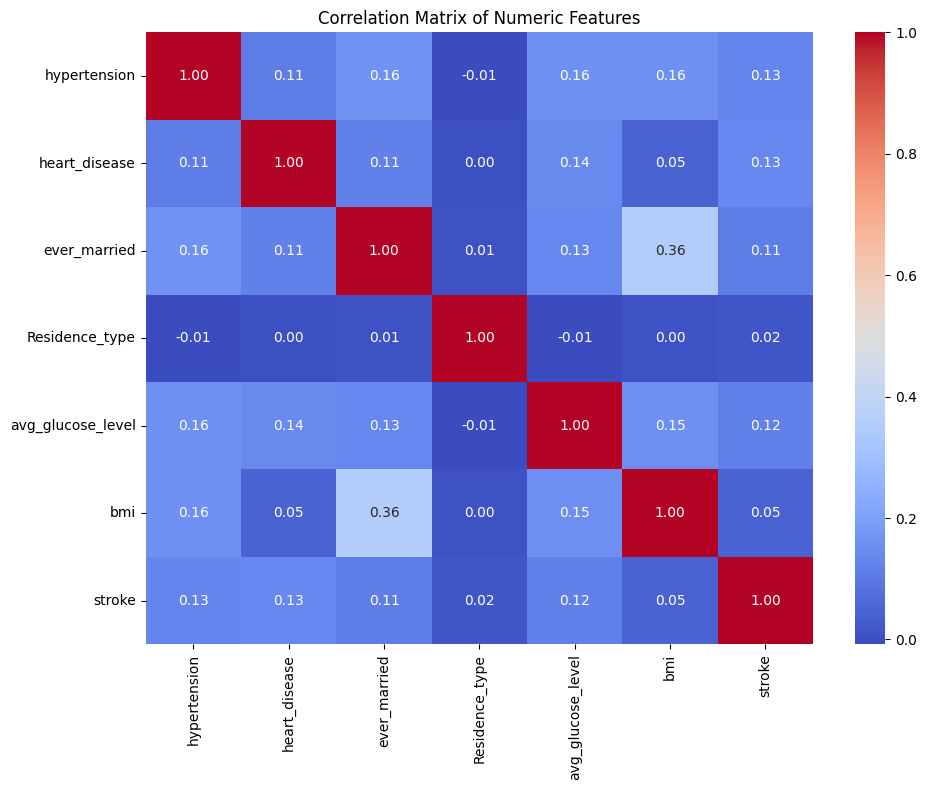

In [214]:
# 1- What is the correlation between numeric features?
correlation_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Numeric Features")
plt.tight_layout()
plt.show()

In [215]:
#2-which Features is most strongly correlated with stroke?
correlation_matrix = df.corr(numeric_only=True)
stroke_corr = correlation_matrix['stroke'].drop('stroke')
stroke_corr_sorted = stroke_corr.sort_values(ascending=False)
print("Top features correlated with stroke:\n")
print(stroke_corr_sorted)

Top features correlated with stroke:

heart_disease        0.134914
hypertension         0.127904
avg_glucose_level    0.115652
ever_married         0.108340
bmi                  0.045765
Residence_type       0.015458
Name: stroke, dtype: float64


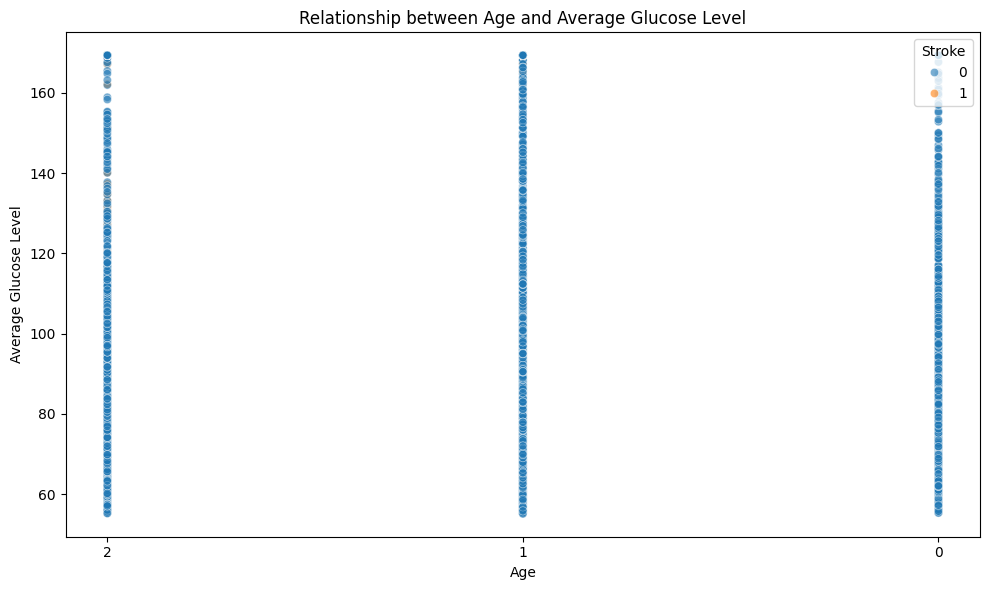

In [216]:
#3- What is the relationship between age and glucose level:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age_range', y='avg_glucose_level', data=df, hue='stroke', alpha=0.6)
plt.title("Relationship between Age and Average Glucose Level")
plt.xlabel("Age")
plt.ylabel("Average Glucose Level")
plt.legend(title="Stroke")
plt.tight_layout()
plt.show()

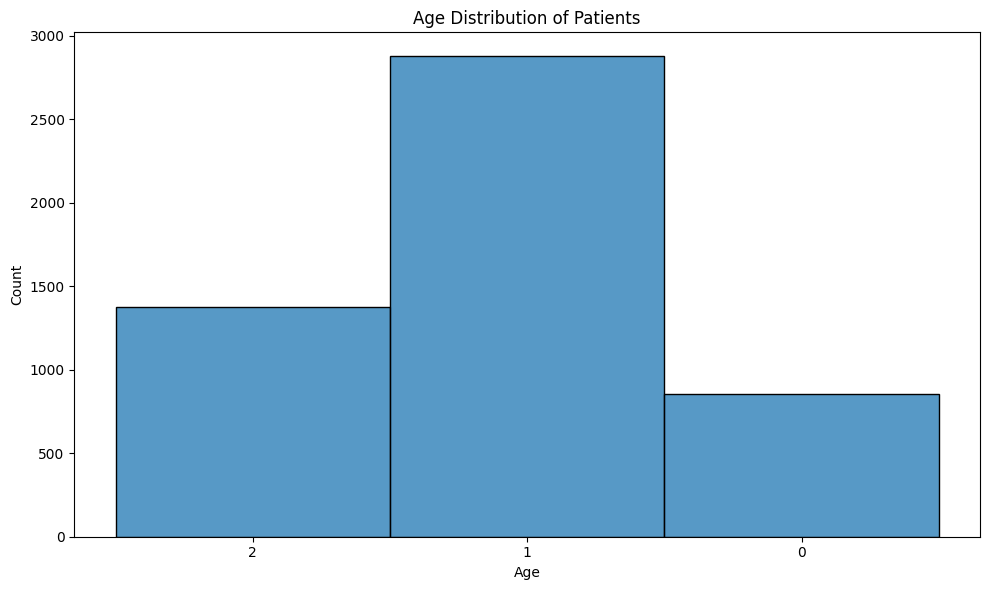

In [217]:
#4-Age distribution:
plt.figure(figsize=(10, 6))
sns.histplot(df['age_range'], bins=30)
plt.title("Age Distribution of Patients")
plt.xlabel("Age")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

In [218]:
#7-What is the average glucose level for stroke patients versus non-stroke patients?
mean_glucose_stroke = df[df['stroke'] == 1]['avg_glucose_level'].mean()
mean_glucose_non_stroke = df[df['stroke'] == 0]['avg_glucose_level'].mean()
print("Average glucose level for stroke patients: {mean_glucose_stroke}")
print("Average glucose level for non-stroke patients: {mean_glucose_non_stroke}")

Average glucose level for stroke patients: {mean_glucose_stroke}
Average glucose level for non-stroke patients: {mean_glucose_non_stroke}


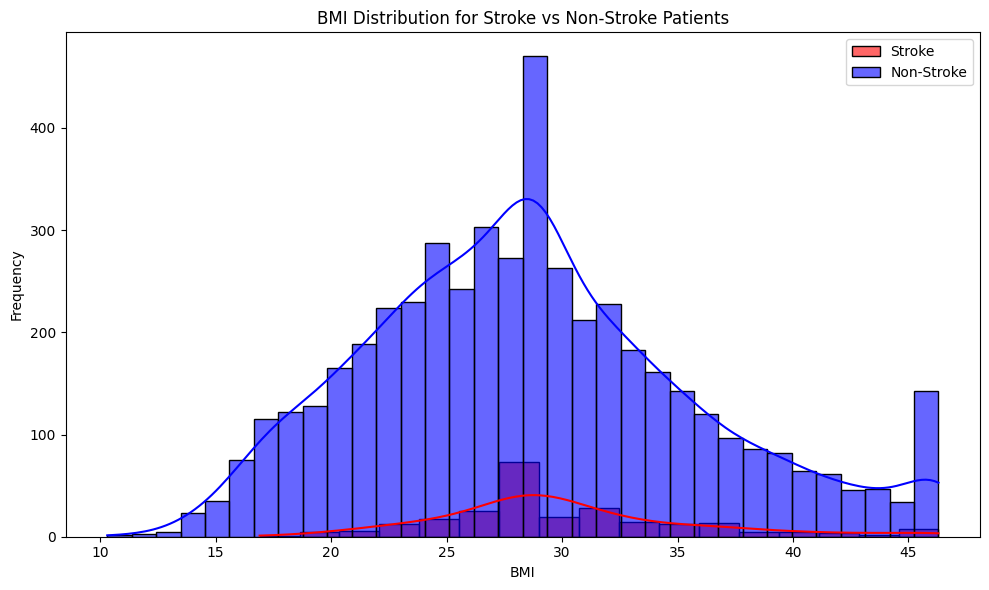

In [219]:
#8-How is BMI distributed between stroke and non-stroke patients?
plt.figure(figsize=(10, 6))
sns.histplot(df[df['stroke'] == 1]['bmi'], kde=True, color='red', label='Stroke', alpha=0.6)
sns.histplot(df[df['stroke'] == 0]['bmi'], kde=True, color='blue', label='Non-Stroke', alpha=0.6)
plt.title("BMI Distribution for Stroke vs Non-Stroke Patients")
plt.xlabel("BMI")
plt.ylabel("Frequency")
plt.legend()
plt.tight_layout()
plt.show()

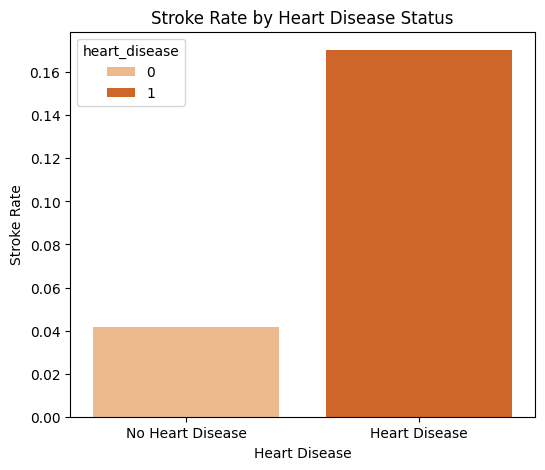

In [220]:
#10-Is heart disease a strong indicator of stroke risk?
grouped_heart = df.groupby('heart_disease')['stroke'].mean().reset_index()

plt.figure(figsize=(6, 5))
sns.barplot(data=grouped_heart, x='heart_disease', y='stroke', hue='heart_disease', palette='Oranges')
plt.title('Stroke Rate by Heart Disease Status')
plt.xticks([0, 1], ['No Heart Disease', 'Heart Disease'])
plt.ylabel('Stroke Rate')
plt.xlabel('Heart Disease')
plt.show()

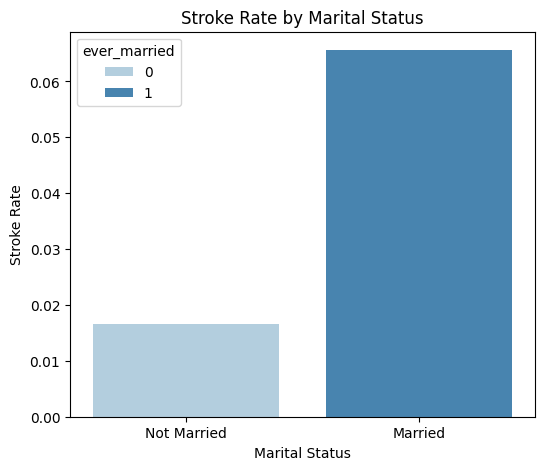

In [221]:
#11-Are married people more likely to have a stroke than unmarried people?
grouped_married = df.groupby('ever_married')['stroke'].mean().reset_index()

plt.figure(figsize=(6, 5))
sns.barplot(data=grouped_married, x='ever_married', y='stroke', hue='ever_married', palette='Blues')
plt.title('Stroke Rate by Marital Status')
plt.xticks([0, 1], ['Not Married', 'Married'])
plt.ylabel('Stroke Rate')
plt.xlabel('Marital Status')
plt.show()

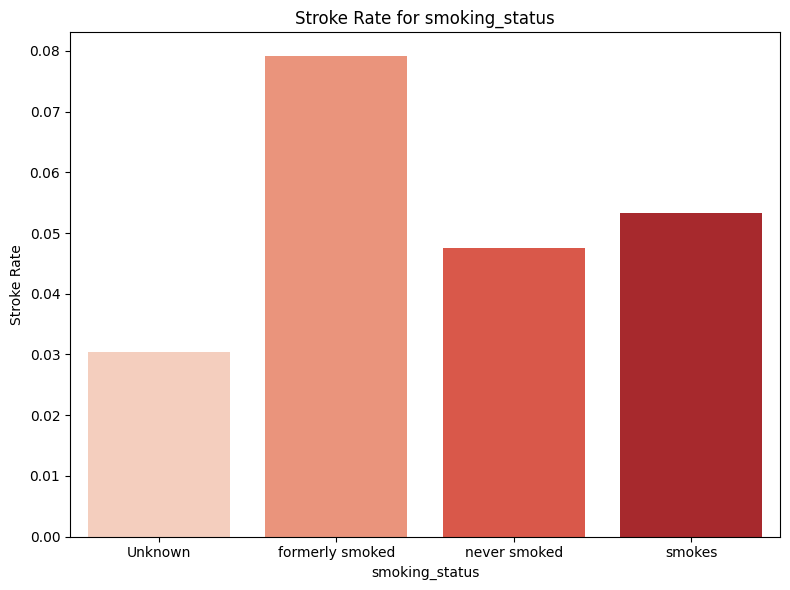

In [222]:
#13-What is the stroke rate among smokers versus non-smokers?
smoking_columns = [col for col in df.columns if col.startswith('smoking_status')]
for col in smoking_columns:
    grouped_smoking = df.groupby(col)['stroke'].mean().reset_index()
    plt.figure(figsize=(8, 6))
    sns.barplot(x=col, y='stroke', data=grouped_smoking, hue=col, palette='Reds')
    plt.title(f'Stroke Rate for {col}')
    plt.ylabel('Stroke Rate')
    plt.xlabel(col)
    plt.tight_layout()
    plt.show()

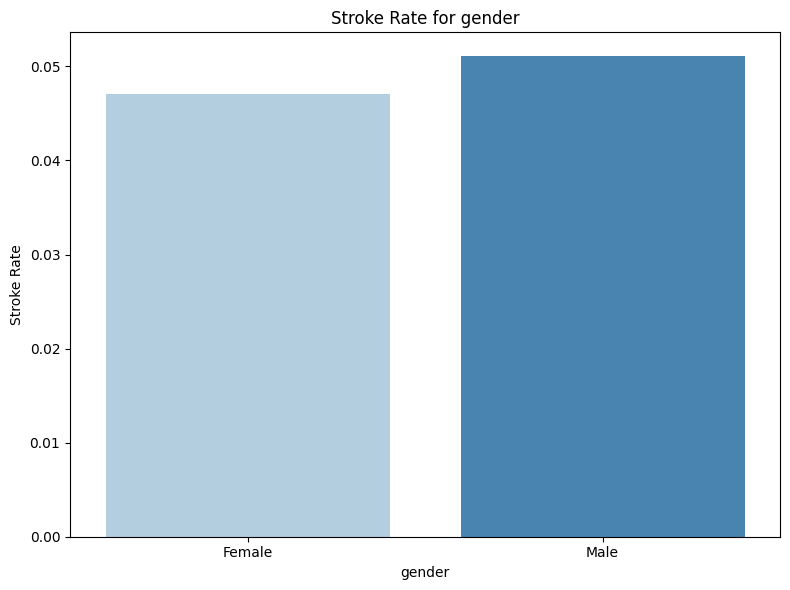

In [223]:
#14-Is there a difference in stroke rate between men and women?
gender_columns = [col for col in df.columns if 'gender' in col]
for col in gender_columns:
    grouped_gender = df.groupby(col)['stroke'].mean().reset_index()
    plt.figure(figsize=(8, 6))
    sns.barplot(x=col, y='stroke', data=grouped_gender, hue=col, palette='Blues')
    plt.title(f'Stroke Rate for {col}')
    plt.ylabel('Stroke Rate')
    plt.xlabel(col)
    plt.tight_layout()
    plt.show()

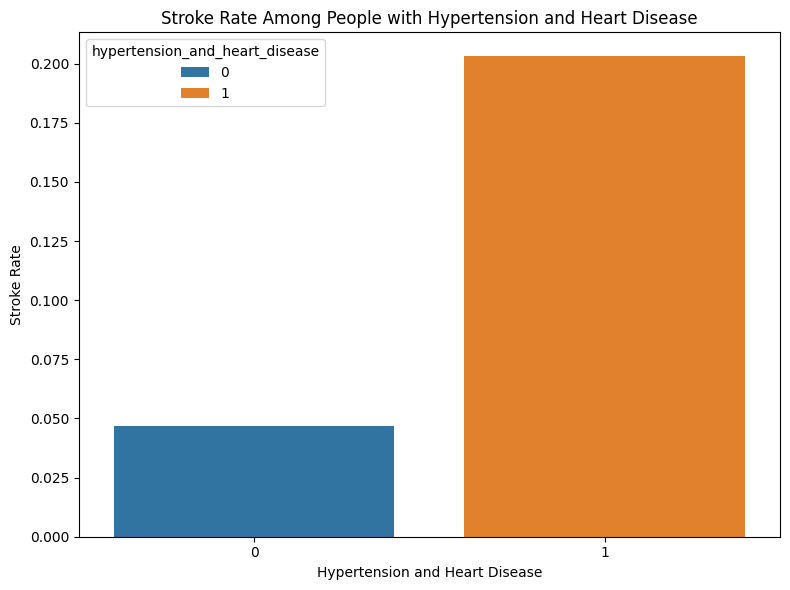

In [224]:
#15-What is the stroke rate among people who have both hypertension and heart disease?
df['hypertension_and_heart_disease'] = df['hypertension'] & df['heart_disease']
grouped_hypertension_heart = df.groupby('hypertension_and_heart_disease')['stroke'].mean().reset_index()
plt.figure(figsize=(8, 6))
sns.barplot(x='hypertension_and_heart_disease', y='stroke', data=grouped_hypertension_heart, hue='hypertension_and_heart_disease')
plt.title('Stroke Rate Among People with Hypertension and Heart Disease')
plt.ylabel('Stroke Rate')
plt.xlabel('Hypertension and Heart Disease')
plt.tight_layout()
plt.show()

# **Data Reduction**

*Recursive Feature Elimination (RFE) – Feature Selection*

In [225]:
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.naive_bayes import GaussianNB

X = df.drop(columns='stroke')
y = df['stroke']

X = X.select_dtypes(include=['int64', 'float64'])

selector = SelectKBest(score_func=chi2, k=3)
X_selected = selector.fit_transform(X, y)

> ## **Data Transformation**

*Encoding Categorical Variables*

In [226]:
df = pd.get_dummies(df, columns=['work_type', 'gender'])

In [227]:
df = pd.get_dummies(df, columns=['smoking_status'])

In [228]:
new_columns = ['work_type_Govt_job', 'work_type_Never_worked','work_type_Private','work_type_Self-employed','work_type_children','gender_Female','gender_Male','smoking_status_Unknown','smoking_status_formerly smoked','smoking_status_never smoked','smoking_status_smokes']
df[new_columns] = df[new_columns].astype(int)

In [229]:
print(df.columns)

Index(['hypertension', 'heart_disease', 'ever_married', 'Residence_type',
       'avg_glucose_level', 'bmi', 'stroke', 'age_range',
       'hypertension_and_heart_disease', 'work_type_Govt_job',
       'work_type_Never_worked', 'work_type_Private',
       'work_type_Self-employed', 'work_type_children', 'gender_Female',
       'gender_Male', 'smoking_status_Unknown',
       'smoking_status_formerly smoked', 'smoking_status_never smoked',
       'smoking_status_smokes'],
      dtype='object')


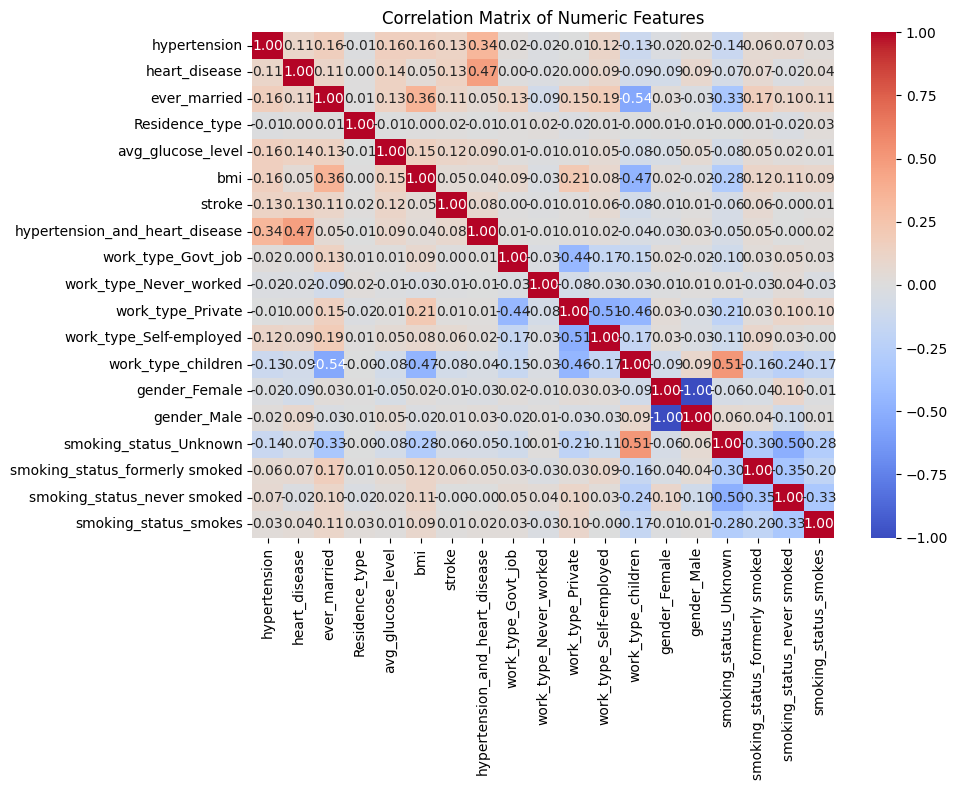

In [230]:
#seteleh encoding
correlation_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Numeric Features")
plt.tight_layout()
plt.show()


*Feature Scaling*

In [231]:
from sklearn.preprocessing import StandardScaler

# Buat objek scaler
scaler = StandardScaler()

# Pilih fitur numerik yang ingin dinormalisasi
numeric_cols = ['heart_disease', 'avg_glucose_level', 'hypertension']

# Fit dan transformasi data
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

> ## **Modelling**

*Data Balancing*

*Random Undersampling*

In [232]:
from imblearn.under_sampling import RandomUnderSampler


rus = RandomUnderSampler(random_state=42)

X_resampled, y_resampled = rus.fit_resample(X, y)

X_resampled = pd.DataFrame(X_resampled, columns=X.columns)

y_resampled = pd.Series(y_resampled, name='stroke_new')  # Fix: pastikan 1D dan bernama

df_balanced = pd.concat([X_resampled, y_resampled], axis=1)

stroke_new = print("Distribusi kelas setelah balancing:\n", df_balanced['stroke_new'].value_counts())

Distribusi kelas setelah balancing:
 stroke_new
0    249
1    249
Name: count, dtype: int64


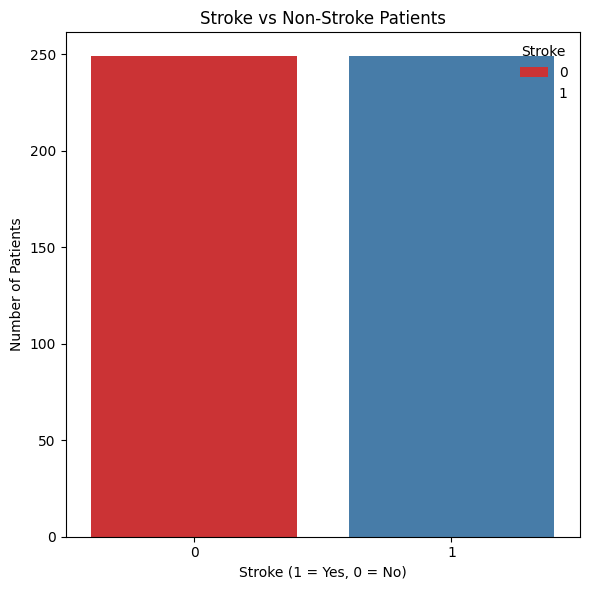

In [233]:
#6.How many patients had a stroke compared to those who didn’t?
stroke_counts = df_balanced['stroke_new'].value_counts()
plt.figure(figsize=(6, 6))
sns.barplot(x=stroke_counts.index, y=stroke_counts.values, hue=stroke_counts.index, palette='Set1')
plt.title("Stroke vs Non-Stroke Patients")
plt.xlabel("Stroke (1 = Yes, 0 = No)")
plt.ylabel("Number of Patients")
plt.legend(title="Stroke", loc="upper right", frameon=False)  # لإخفاء مفتاح الرسم
plt.tight_layout()
plt.show()

In [234]:
from sklearn.impute import SimpleImputer

# Buat imputer (misalnya isi NaN dengan nilai rata-rata)
imputer = SimpleImputer(strategy="mean")

# Fit dan transform X
X = imputer.fit_transform(X)


*Data Splitting*

In [235]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

*Training Model*

**Elbow Method**

#  K-Means

In [236]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import pandas as pd

In [237]:
X = df.drop('stroke', axis=1)

In [238]:
X_scaled = scaler.fit_transform(X)
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X_scaled)
labels = kmeans.labels_
df['cluster'] = kmeans.fit_predict(X_scaled)
print(df['cluster'].value_counts())


cluster
0    4357
1     753
Name: count, dtype: int64


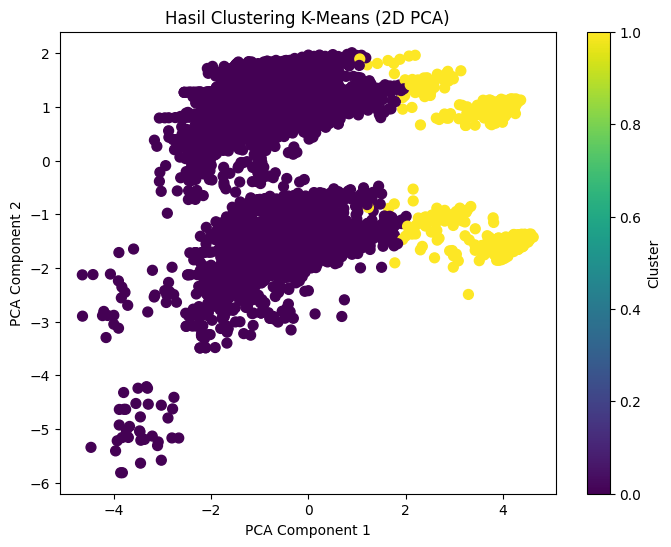

In [239]:
import seaborn as sns
from sklearn.decomposition import PCA

# Reduksi dimensi dengan PCA untuk visualisasi 2D
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(X_scaled)

# Visualisasi hasil clustering
plt.figure(figsize=(8, 6))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=kmeans.labels_, cmap='viridis', s=50)
plt.title('Hasil Clustering K-Means (2D PCA)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.show()

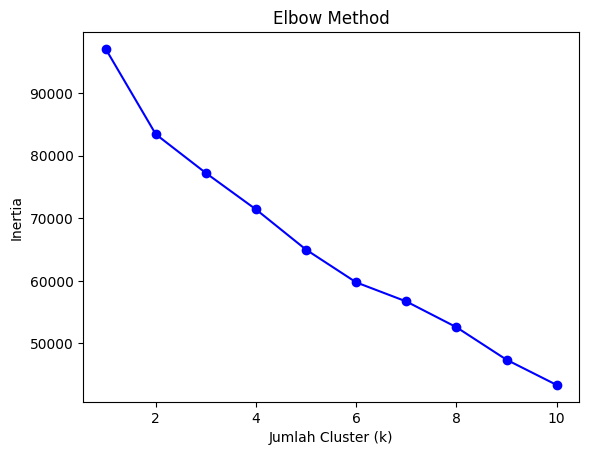

In [240]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

inertia = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(K, inertia, 'bo-')
plt.xlabel('Jumlah Cluster (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

In [241]:
print(df['cluster'].value_counts())

cluster
0    4357
1     753
Name: count, dtype: int64


# Logistic Regression

In [242]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [243]:
X = df.drop(columns=['stroke'])  # fitur
y = df['stroke']                 # target

In [244]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [245]:
model = LogisticRegression(max_iter=1000)  # max_iter supaya konvergen
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [246]:
y_pred = model.predict(X_test)

In [247]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9393346379647749

Classification Report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97       960
           1       0.00      0.00      0.00        62

    accuracy                           0.94      1022
   macro avg       0.47      0.50      0.48      1022
weighted avg       0.88      0.94      0.91      1022



> ## **Evaluasi Model**

In [248]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9393346379647749


In [249]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix:\n {conf_matrix}")

Confusion Matrix:
 [[960   0]
 [ 62   0]]


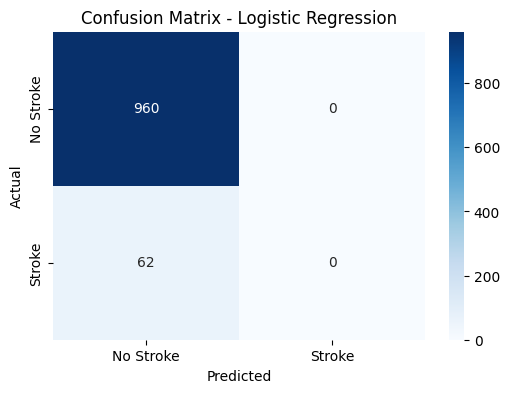

In [250]:
#visualisasi
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Hitung confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualisasi confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Stroke', 'Stroke'], yticklabels=['No Stroke', 'Stroke'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

In [251]:
print('classification_report')
print(classification_report(y_test, y_pred))

classification_report
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       960
           1       0.00      0.00      0.00        62

    accuracy                           0.94      1022
   macro avg       0.47      0.50      0.48      1022
weighted avg       0.88      0.94      0.91      1022



In [252]:
from sklearn.metrics import roc_curve, auc, roc_auc_score

In [253]:
y_proba = model.predict_proba(X_test)[:, 1]

In [254]:
fpr, tpr, thresholds = roc_curve(y_test, y_proba)

In [255]:
roc_auc = auc(fpr, tpr)

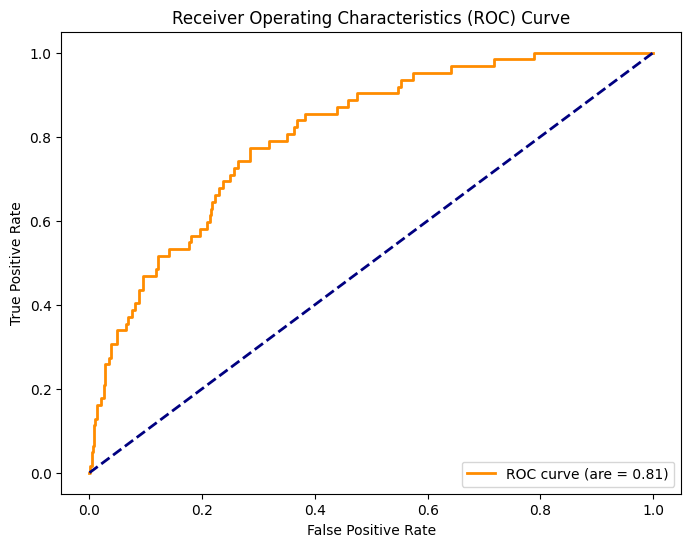

In [256]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (are = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Garis baseline
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristics (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

#### **Model Tuning**

In [257]:
from sklearn.model_selection import cross_val_predict, cross_val_score

In [258]:
model = LogisticRegression(max_iter=1000)

In [259]:
scores = cross_val_score(model, X, y, cv=5, scoring='roc_auc')

In [260]:
y_pred_cv = cross_val_predict(model, X, y, cv=5)
accuracy = accuracy_score(y, y_pred_cv)
print(f"Akurasi (Cross-Validation): {accuracy:.2f}")

Akurasi (Cross-Validation): 0.95


In [261]:
print('Confusion Matrix')
print(confusion_matrix(y_test,y_pred))

Confusion Matrix
[[960   0]
 [ 62   0]]


In [262]:
print('classification_report')
print(classification_report(y_test, y_pred))

classification_report
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       960
           1       0.00      0.00      0.00        62

    accuracy                           0.94      1022
   macro avg       0.47      0.50      0.48      1022
weighted avg       0.88      0.94      0.91      1022



In [263]:
# Tampilkan hasil
print("ROC AUC Scores per fold:", scores)
print("Rata-rata ROC AUC Score:", scores.mean())

print("Akurasi per fold:", y_pred_cv)
print("Rata-rata Akurasi:", y_pred_cv.mean())

ROC AUC Scores per fold: [0.80882716 0.78754115 0.79436214 0.80030864 0.79417749]
Rata-rata ROC AUC Score: 0.7970433161299489
Akurasi per fold: [0 0 0 ... 0 0 0]
Rata-rata Akurasi: 0.0


> ## **Deployement**

In [264]:
import joblib

joblib.dump(model, "model.pkl")

['model.pkl']

In [265]:
pip install pyngrok

In [266]:
!ngrok config add-authtoken 2wwSSaRrDJzzsO0kijjSW3M6LES_7spHt4rwfE3cVEFt71qha

Authtoken saved to configuration file: C:\Users\anisa\AppData\Local/ngrok/ngrok.yml


In [267]:
pip install streamlit

Note: you may need to restart the kernel to use updated packages.


In [290]:
%%writefile app.py

import streamlit as st
import pandas as pd
import plotly.express as px
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer

# ----------------- Setup -------------------
st.set_page_config(
    page_title="Stroke Awareness Dashboard",
    page_icon="🧠",
    layout="wide",
    initial_sidebar_state="expanded"
)

st.markdown("""
<style>
    /* Judul besar */
    h1 {
        font-size: 3rem !important;
        color: #003366;
        font-weight: 700;
    }
    h2 {
        font-size: 2.5rem !important;
        color: #003366;
    }
    h3 {
        font-size: 2rem !important;
        color: #004080;
    }
    /* Teks biasa */
    .css-1d391kg p, .css-1d391kg span {
        font-size: 1.25rem !important;
        color: #333333;
    }
    /* Label input dan select box */
    label {
        font-size: 1.1rem !important;
        font-weight: 600;
    }
    /* Tombol */
    .stButton>button {
        font-size: 1.2rem !important;
        padding: 10px 25px;
        background-color: #0073e6;
        color: white;
        border-radius: 8px;
        font-weight: bold;
    }
</style>
""", unsafe_allow_html=True)

# Judul dan deskripsi utama
st.title("🧠 Stroke Awareness Dashboard")
st.write("Mari kita tingkatkan kesadaran tentang stroke dengan data dan prediksi berbasis AI. Yuk, jaga kesehatan otak kita bersama!")

# Tombol di kanan atas dengan kolom
col_left, col_right = st.columns([9,1])
with col_right:
    if not st.session_state.get('show_prediksi', False):
        if st.button("🩺 Mulai Prediksi"):
            st.session_state['show_prediksi'] = True

# Inisialisasi state jika belum ada
if 'show_prediksi' not in st.session_state:
    st.session_state['show_prediksi'] = False

# Load data dan model
@st.cache_data
def load_data():
    data = pd.read_csv("healthcare-dataset-stroke-data (1).csv")
    data = data.drop(columns=["id"])
    return data

data_raw = load_data()

@st.cache_resource
def prepare_model():
    df = data_raw.dropna()
    df_encoded = pd.get_dummies(df, drop_first=True)
    X = df_encoded.drop("stroke", axis=1)
    y = df_encoded["stroke"]
    imputer = SimpleImputer(strategy="mean")
    X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)
    model = LogisticRegression(max_iter=500)
    model.fit(X_imputed, y)
    return model, imputer, X.columns

model, imputer, feature_cols = prepare_model()

# Fungsi encode input
def encode_input(age, avg_glucose, bmi, gender, hypertension, heart_disease,
                 ever_married, work_type, residence_type, smoking_status):
    data = {
        "age": age,
        "avg_glucose_level": avg_glucose,
        "bmi": bmi,
        "gender_Male": 1 if gender == "Male" else 0,
        "hypertension": 1 if hypertension == "Ya" else 0,
        "heart_disease": 1 if heart_disease == "Ya" else 0,
        "ever_married_Yes": 1 if ever_married == "Ya" else 0,
        "work_type_Govt_job": 1 if work_type == "Govt_job" else 0,
        "work_type_Never_worked": 1 if work_type == "Never_worked" else 0,
        "work_type_Private": 1 if work_type == "Private" else 0,
        "work_type_Self-employed": 1 if work_type == "Self-employed" else 0,
        "work_type_children": 1 if work_type == "children" else 0,
        "Residence_type_Urban": 1 if residence_type == "Urban" else 0,
        "smoking_status_formerly smoked": 1 if smoking_status == "formerly smoked" else 0,
        "smoking_status_never smoked": 1 if smoking_status == "never smoked" else 0,
        "smoking_status_smokes": 1 if smoking_status == "smokes" else 0,
        "smoking_status_Unknown": 1 if smoking_status == "Unknown" else 0
    }
    df = pd.DataFrame([data])
    for col in feature_cols:
        if col not in df.columns:
            df[col] = 0
    df = df[feature_cols]
    df = pd.DataFrame(imputer.transform(df), columns=feature_cols)
    return df

# Konten utama
if st.session_state['show_prediksi']:
    st.markdown("---")
    st.header("🩺 Form Prediksi Risiko Stroke")

    with st.form("stroke_form", clear_on_submit=False):
        col1, col2, col3 = st.columns(3)
        with col1:
            gender = st.selectbox("Jenis Kelamin", ["Female", "Male"])
            age = st.slider("Umur", 0, 120, 30)
            hypertension = st.selectbox("Hipertensi", ["Tidak", "Ya"])
        with col2:
            heart_disease = st.selectbox("Penyakit Jantung", ["Tidak", "Ya"])
            ever_married = st.selectbox("Pernah Menikah", ["Tidak", "Ya"])
            work_type = st.selectbox("Jenis Pekerjaan", ["Govt_job", "Never_worked", "Private", "Self-employed", "children"])
        with col3:
            residence_type = st.selectbox("Tipe Tempat Tinggal", ["Rural", "Urban"])
            avg_glucose = st.number_input("Rata-rata Glukosa", min_value=0.0, max_value=500.0, value=100.0, step=0.1)
            bmi = st.number_input("BMI", min_value=0.0, max_value=100.0, value=22.0, step=0.1)
        smoking_status = st.selectbox("Status Merokok", ["Unknown", "formerly smoked", "never smoked", "smokes"])

        submit = st.form_submit_button("🔍 Prediksi Risiko")

    if submit:
        input_encoded = encode_input(age, avg_glucose, bmi, gender, hypertension,
                                     heart_disease, ever_married, work_type,
                                     residence_type, smoking_status)
        prob = model.predict_proba(input_encoded)[0][1]
        pred = model.predict(input_encoded)[0]

        st.markdown("### Hasil Prediksi")
        st.write(f"**Risiko Stroke:** {'⚠️ Tinggi' if pred == 1 else '✅ Rendah'}")
        st.progress(int(prob * 100))
        st.write(f"**Probabilitas:** {prob:.2%}")

        if prob > 0.5:
            st.warning("🚨 Hasil ini menunjukkan risiko tinggi. Segera konsultasi dengan dokter, ya!")
        else:
            st.success("🎉 Risiko stroke tergolong rendah. Terus jaga pola hidup sehat!")

        # Tombol kembali ke dashboard
        if st.button("🔙 Kembali ke Dashboard"):
            st.session_state['show_prediksi'] = False
            st.experimental_rerun()

else:
    st.header("📊 Visualisasi Faktor Risiko Stroke")
    st.markdown("""
    Yuk, intip grafik dan insight tentang faktor-faktor yang mempengaruhi risiko stroke. Dengan data ini, kamu bisa lebih paham bagaimana menjaga kesehatan otak dan tubuhmu supaya tetap prima! 💪🧠
    """)

    with st.container():
        st.markdown('<div class="viz-container">', unsafe_allow_html=True)

        fig_age = px.histogram(data_raw, x="age", color="stroke", barmode="overlay",
                               color_discrete_map={0: 'skyblue', 1: 'orangered'},
                               title="Distribusi Umur dan Risiko Stroke")
        fig_age.update_layout(
                                    xaxis_title="Umur")
        st.plotly_chart(fig_age, use_container_width=True)
        st.write("📈 Usia memegang peranan penting dalam risiko stroke. Lihat bagaimana distribusinya!")

        fig_glucose = px.histogram(data_raw, x="avg_glucose_level", color="stroke", barmode="overlay",
                                   color_discrete_map={0: 'skyblue', 1: 'orangered'},
                                   title="Distribusi Glukosa dan Risiko Stroke")
        fig_glucose.update_layout(
                                    xaxis_title="Rata-rata Glukosa Level")
        st.plotly_chart(fig_glucose, use_container_width=True)
        st.write("🩸 Kadar glukosa darah yang tinggi dapat meningkatkan risiko stroke. Yuk, perhatikan pola makanmu!")

        fig_bmi = px.histogram(data_raw, x="bmi", color="stroke", barmode="overlay",
                               color_discrete_map={0: 'skyblue', 1: 'orangered'},
                               title="Distribusi BMI dan Risiko Stroke")
        fig_bmi.update_layout(
                                    xaxis_title="BMI")
        st.plotly_chart(fig_bmi, use_container_width=True)
        st.write("⚖️ BMI juga penting! Jaga berat badan ideal agar risiko stroke bisa ditekan.")

        fig_smoke = px.bar(data_raw.groupby("smoking_status")["stroke"].mean().reset_index(),
                           x="smoking_status", y="stroke",
                           color="stroke",
                           title="Proporsi Stroke Berdasarkan Status Merokok",
                           labels={"stroke": "Proporsi Stroke"},
                           color_discrete_sequence=["orangered"])
        fig_smoke.update_layout(
                                    xaxis_title="Kebiasaan Merokok")
        st.plotly_chart(fig_smoke, use_container_width=True)
        st.write("🚭 Merokok dapat meningkatkan risiko stroke. Saatnya berhenti demi masa depan sehatmu!")

        st.markdown('</div>', unsafe_allow_html=True)



Overwriting app.py


In [282]:
from pyngrok import ngrok
import threading
import time
import os

In [291]:
import os
import threading
import time
from pyngrok import ngrok

# Jalankan Streamlit di background
def start_streamlit():
    os.system("streamlit run app.py")

threading.Thread(target=start_streamlit).start()

# Tunggu agar streamlit siap
time.sleep(5)

# Buka tunnel ngrok
public_url = ngrok.connect(8501)
print(f"Aplikasi Streamlit dapat diakses di: {public_url}")


PyngrokNgrokHTTPError: ngrok client exception, API returned 502: {"error_code":103,"status_code":502,"msg":"failed to start tunnel","details":{"err":"failed to start tunnel: Your account may not run more than 3 tunnels over a single ngrok agent session.\nThe tunnels already running on this session are:\ntn_2yAtOHybg0Wp6NBtM3uIYSsUYSe, tn_2yAsksFZTK9pAzh9FY9P3VjOVda, tn_2yAt30qpzaOFJKaATw01uEyosjK\n\r\n\r\nERR_NGROK_324\r\n"}}


In [271]:
ngrok.kill()  # Mematikan semua tunnel saat program berakhir
